In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import plotly.plotly as py
import plotly.graph_objs as go
from bokeh.io import output_file, show, output_notebook, curdoc
from bokeh.plotting import figure, output_file, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, Select,FixedTicker, PrintfTickFormatter, Legend
from bokeh.models.widgets import Select
from bokeh.layouts import column
from bokeh.palettes import Category10, Category20, Inferno
import colorcet as cc
import seaborn as sns
from numpy import linspace
from scipy.stats.kde import gaussian_kde


import datetime
%load_ext blackcellmagic
%matplotlib inline

# 6.1

In [2]:
data1 = pd.read_csv('6.1CumulativeInstalledCapacityQuarterly.csv', index_col=0, parse_dates=True)
for row in data1.index:
    if str(row)=='nan':
        data1.drop(row, inplace=True)

In [3]:
data2 = pd.read_csv('6.1GenerationQuarterly.csv', index_col=0, parse_dates=True)
for row in data2.index:
    if str(row)=='nan':
        data2.drop(row, inplace=True)

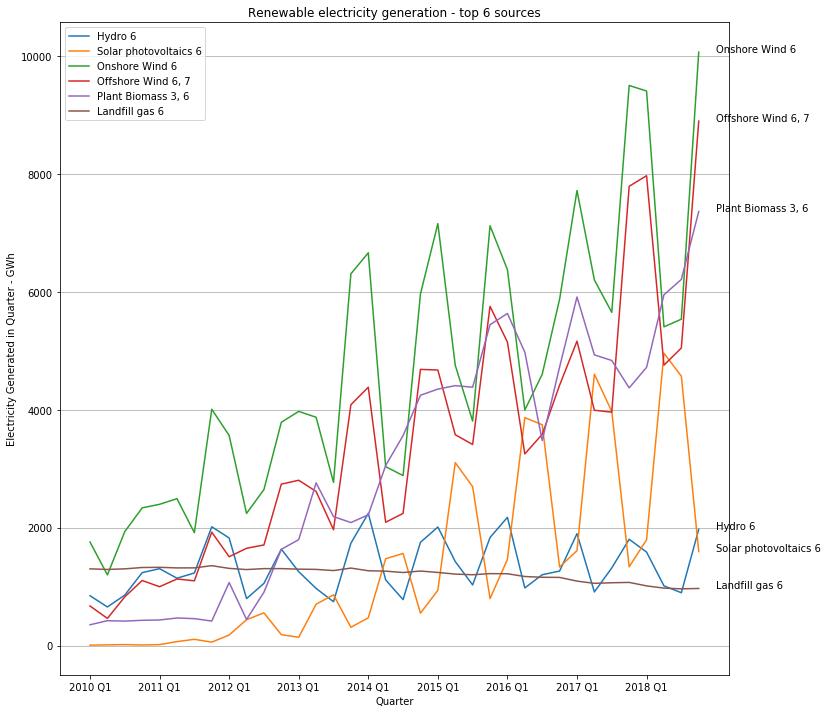

In [4]:
data3 = data2.transpose()
data3
fig=plt.figure(figsize = [12,12])
ax = fig.add_subplot(111)
for col in (set(data3.columns)-set(['Total '])):
    
    data3[col] = data3[col].replace({',':'','-':'0'},regex=True)
    data3[col] = data3[col].apply(lambda x: int(float(x.strip())))
    if data3[col].max()<1000:
        continue
    plt.plot(data3[col], label = col)
    plt.text(data3.shape[0], data3[col][-1], col)
ax.set(title= 'Renewable electricity generation - top 6 sources',\
       ylabel = 'Electricity Generated in Quarter - GWh', xlabel='Quarter')
ax.xaxis.set(ticks=range(0,35,4))       
ax.grid(True, axis='y')
plt.legend()

plt.show()


# 5.1

In [5]:
data4 = pd.read_csv('5.1SuppliedQuarterly.csv', index_col=0, parse_dates=True, skiprows=4, header=[0,1])
data4.drop('Year',1, level=0,inplace=True)
data4.dropna(axis=1, thresh=1, inplace=True)

In [6]:
data5 = data4.transpose()
data5.index.set_names(['Year','Quarter'])
data5.head()


Coal   Oil    Gas  Nuclear  Hydro (natural flow)   \
1998 1st quarter  33.68  1.98  29.71    23.64                   1.87   
     2nd quarter  27.16  1.65  26.38    21.52                   0.82   
     3rd quarter  25.99  1.48  27.55    20.88                   0.85   
     4th quarter  30.20  1.73  32.64    24.56                   1.55   
1999 1st quarter  29.12  1.89  35.98    24.18                   1.87   

                  Wind and Solar  - of which, Offshore  Bioenergy  \
1998 1st quarter            0.21                   NaN       0.71   
     2nd quarter            0.21                   NaN       0.73   
     3rd quarter            0.22                   NaN       0.75   
     4th quarter            0.23                   NaN       0.79   
1999 1st quarter            0.20                   NaN       0.87   

                  Pumped storage (net supply)  Other fuels  Net imports  \
1998 1st quarter                        -0.26         1.49         4.21   
     2nd quarter                        -0.23         0.87         3.98   
     3rd quarter                        -0.26         0.81         0.85   
     4th quarter                        -0.27         0.88         3.43   
1999 1st quarter                        -0.28         1.51         3.62   

                  Total all generating companies  
1998 1st quarter                           97.22  
     2nd quarter                           83.08  
     3rd quarter                           79.13  
     4th quarter                           95.74  
1999 1st quarter                           98.97

In [7]:
data5.iloc[79,[0,1,2,3,4,5,7,8,9,10]].sum()

88.88

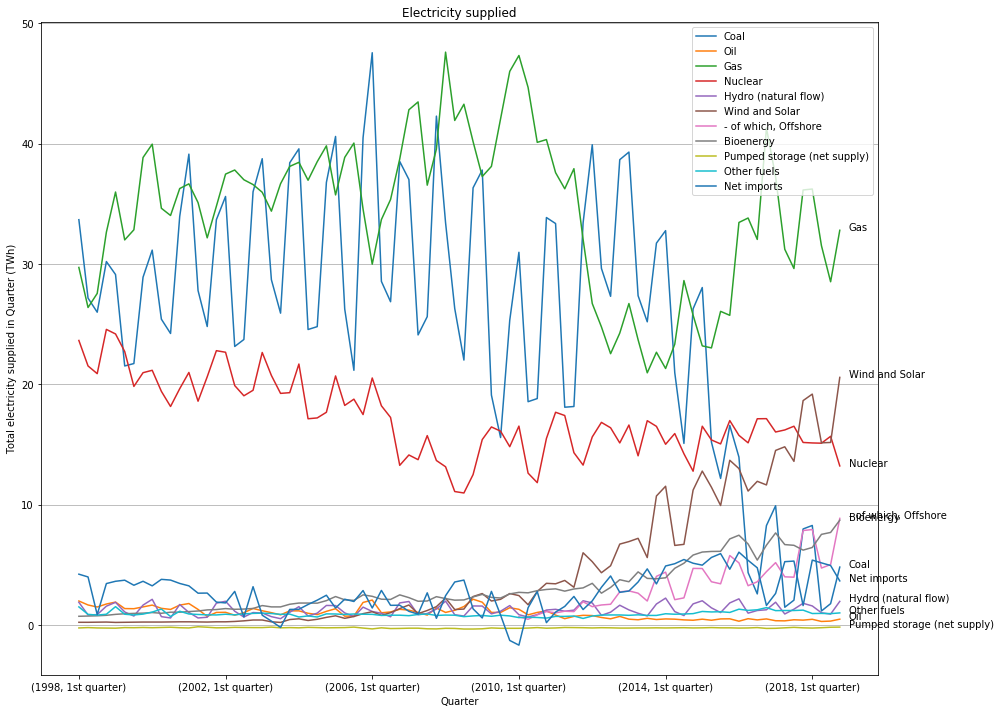

In [8]:
fig=plt.figure(figsize = [15,12])
ax = fig.add_subplot(111)
ax.xaxis.set(ticks=range(0,data5.shape[0],16))#,ticklabels=[0,0,0,0,0,0,30,0,0,0,0,0,0,10,0,0,0])
#ticklabels=list(range(1998,2019,4))) #, ticks=range(0, ,4),

ax.set(title= 'Electricity supplied',\
       ylabel = 'Total electricity supplied in Quarter (TWh)', xlabel='Quarter')
data5.drop('Total all generating companies',axis=1).plot(ax=ax)     
ax.grid(True, axis='y')
plt.legend()

for col in (set(data5.columns)-set(['Total all generating companies'])):
    plt.text(data5.shape[0], data5[col][-1], col)

In [9]:
#py.iplot([{
#    'x': np.arange(len(data5)),
#    'y': data5[col],
#    'name': col
#}  for col in (set(data5.columns)-set(['Total all generating companies']))])



In [10]:
# Put a column with the date
#data5.index[2][0]
#data5['Date'] = datetime.datetime(data5.index,1,1,0,0)
data51 = data5.reset_index()
data51
data51['Year'] = data51.apply(lambda row: int(row['level_0']), axis=1)
data51['Quarter'] = data51.apply(lambda row: int(str(row['level_1'])[0]), axis=1)
data51['Date'] = data51.apply(lambda row: datetime.datetime(row['Year'],(3*(row['Quarter'])-2),1), axis=1)
#data51['Date'] = pd.to_datetime(data51['Date'])
data51

,level_0,level_1,Coal,Oil,Gas,Nuclear,Hydro (natural flow),Wind and Solar,"- of which, Offshore",Bioenergy,Pumped storage (net supply),Other fuels,Net imports,Total all generating companies,Year,Quarter,Date
0,1998,1st quarter,33.68,1.98,29.71,23.64,1.87,0.21,NaN,0.71,-0.26,1.49,4.21,97.22,1998,1,1998-01-01
1,1998,2nd quarter,27.16,1.65,26.38,21.52,0.82,0.21,NaN,0.73,-0.23,0.87,3.98,83.08,1998,2,1998-04-01
2,1998,3rd quarter,25.99,1.48,27.55,20.88,0.85,0.22,NaN,0.75,-0.26,0.81,0.85,79.13,1998,3,1998-07-01
3,1998,4th quarter,30.20,1.73,32.64,24.56,1.55,0.23,NaN,0.79,-0.27,0.88,3.43,95.74,1998,4,1998-10-01
4,1999,1st quarter,29.12,1.89,35.98,24.18,1.87,0.20,NaN,0.87,-0.28,1.51,3.62,98.97,1999,1,1999-01-01
5,1999,2nd quarter,21.52,1.35,32.00,22.72,1.07,0.21,NaN,0.92,-0.23,0.88,3.71,84.14,1999,2,1999-04-01
6,1999,3rd quarter,21.72,1.34,32.84,19.82,0.73,0.22,NaN,0.95,-0.24,0.82,3.29,81.49,1999,3,1999-07-01
7,1999,4th quarter,28.90,1.49,38.85,20.96,1.64,0.23,NaN,0.97,-0.22,0.89,3.62,97.32,1999,4,1999-10-01
8,2000,1st quarter,31.15,1.64,39.96,21.16,2.12,0.23,NaN,1.02,-0.24,1.06,3.24,101.32,2000,1,2000-01-01
9,2000,2nd quarter,25.41,1.37,34.63,19.41,0.68,0.23,NaN,0.96,-0.22,1.31,3.78,87.56,2000,2,2000-04-01


In [11]:
def nowtime():
    now=datetime.datetime.now()
    return "".join([str(i) for i in (now.day,0,now.month,now.year,now.hour,now.minute)])

In [12]:
# Now try with Bokeh!
output_file("C:/Users/Chris/Documents/Documents/Python2018/DataVisCW/Plots/AllSourcesLine"+nowtime()+".html")
fig = figure(plot_width=1200, plot_height=600,
             title='All the electricity sources separately with Bokeh - Click legend to hide',
            x_axis_type='datetime', toolbar_location="above")

dataSource = ColumnDataSource(data51)
ylist = ['Coal', 'Oil', 'Gas', 'Nuclear',
       'Hydro (natural flow) ', 'Wind and Solar', '- of which, Offshore',
       'Bioenergy', 'Pumped storage (net supply)', 'Other fuels',
       'Net imports']
colRef = 0
legend=[]
for line in ylist:
    colRef += 1
    lines = fig.line(x='Date', y=line, source=dataSource, 
                     color = Category20[(len(ylist)+1)][colRef],
                    line_width=3) 
    legend.append((str(ylist[colRef-1])+' ',[lines]))
    hover = HoverTool(tooltips =[('Cat',line),('TWh','$y')], renderers=[lines], toggleable=False)
    fig.add_tools(hover)
    
legend = Legend(items=legend, location='center')
fig.add_layout(legend, 'right')
fig.legend.click_policy="hide"

output_notebook()
show(fig)

Loading BokehJS ...

In [13]:
data51.columns

Index(['level_0', 'level_1', 'Coal', 'Oil', 'Gas', 'Nuclear',
       'Hydro (natural flow) ', 'Wind and Solar', '- of which, Offshore',
       'Bioenergy', 'Pumped storage (net supply)', 'Other fuels',
       'Net imports', 'Total all generating companies', 'Year', 'Quarter',
       'Date'],
      dtype='object')

In [14]:
data52 = data51.drop('- of which, Offshore',axis=1)
otherCols = ['Oil','Hydro (natural flow) ','Bioenergy',
             'Pumped storage (net supply)', 'Other fuels','Net imports']
data52['All other'] = data52[otherCols].sum(axis=1)

In [15]:
data52.describe()

,Coal,Oil,Gas,Nuclear,Hydro (natural flow),Wind and Solar,Bioenergy,Pumped storage (net supply),Other fuels,Net imports,Total all generating companies,Year,Quarter,All other
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,25.559881,0.973095,34.316667,17.208214,1.250357,4.502738,3.089643,-0.254167,0.895357,2.770476,90.311786,2008.000000,2.500000,8.724762
std,10.992324,0.486755,6.382445,3.136107,0.465707,5.506757,2.101412,0.037100,0.199478,1.691693,8.822834,6.091669,1.124749,3.244426
min,1.150000,0.280000,20.950000,10.960000,0.510000,0.200000,0.710000,-0.350000,0.530000,-1.690000,75.650000,1998.000000,1.000000,3.230000
25%,19.027500,0.497500,29.912500,15.120000,0.850000,0.352500,1.490000,-0.270000,0.780000,1.502500,83.225000,2003.000000,1.750000,6.525000
50%,26.280000,1.005000,35.850000,16.720000,1.130000,1.660000,2.345000,-0.250000,0.870000,2.770000,88.720000,2008.000000,2.500000,7.770000
75%,33.680000,1.302500,38.462500,19.432500,1.632500,6.762500,3.872500,-0.230000,0.942500,3.735000,98.675000,2013.000000,3.250000,10.077500
max,47.560000,2.130000,47.610000,24.560000,2.220000,20.570000,8.700000,-0.160000,1.510000,6.040000,106.640000,2018.000000,4.000000,16.980000


In [16]:
# Now group up the smaller bits into 'other'

output_file("C:/Users/Chris/Documents/Documents/Python2018/DataVisCW/Plots/AllSourcesGroupedLine"+nowtime()+".html")
fig = figure(plot_width=1200, plot_height=600,
             title='Electricity sources with Bokeh - Click legend to hide',
            x_axis_type='datetime', toolbar_location="above")

dataSource = ColumnDataSource(data52)
ylist = ['Coal','Gas', 'Nuclear','Wind and Solar',
       'All other']
legend=[]
for colRef,line in enumerate(ylist,1):
    lines = fig.line(x='Date', y=line, source=dataSource, 
                     color = Category10[(len(ylist)+1)][colRef],
                    line_width=3) 
    legend.append((str(ylist[colRef-1])+' ',[lines]))
    hover = HoverTool(tooltips =[('Cat',line),('TWh','$y')], renderers=[lines], toggleable=False)
    fig.add_tools(hover)
    
legend = Legend(items=legend, location='center')
fig.add_layout(legend, 'right')
fig.legend.click_policy="hide"

fig.outline_line_color = None
fig.background_fill_color = "#efefef"

#fig.xaxis.ticker = FixedTicker(ticks=list(range(0, xmax,1000)))

#fig.ygrid.grid_line_color = None
#fig.xgrid.grid_line_color = "#dddddd"
#fig.xgrid.ticker = fig.xaxis[0].ticker

fig.xaxis.minor_tick_line_color = 'black'

#fig.axis.major_tick_line_color = None
fig.axis.axis_line_color = 'black'
fig.yaxis.axis_label = 'Total electricity supplied in Quarter (TWh)'

output_notebook()
show(fig)

Loading BokehJS ...

In [50]:
data52.head()
data52.describe()

,Coal,Oil,Gas,Nuclear,Hydro (natural flow),Wind and Solar,Bioenergy,Pumped storage (net supply),Other fuels,Net imports,Total all generating companies,Year,Quarter,All other
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,25.559881,0.973095,34.316667,17.208214,1.250357,4.502738,3.089643,-0.254167,0.895357,2.770476,90.311786,2008.000000,2.500000,8.724762
std,10.992324,0.486755,6.382445,3.136107,0.465707,5.506757,2.101412,0.037100,0.199478,1.691693,8.822834,6.091669,1.124749,3.244426
min,1.150000,0.280000,20.950000,10.960000,0.510000,0.200000,0.710000,-0.350000,0.530000,-1.690000,75.650000,1998.000000,1.000000,3.230000
25%,19.027500,0.497500,29.912500,15.120000,0.850000,0.352500,1.490000,-0.270000,0.780000,1.502500,83.225000,2003.000000,1.750000,6.525000
50%,26.280000,1.005000,35.850000,16.720000,1.130000,1.660000,2.345000,-0.250000,0.870000,2.770000,88.720000,2008.000000,2.500000,7.770000
75%,33.680000,1.302500,38.462500,19.432500,1.632500,6.762500,3.872500,-0.230000,0.942500,3.735000,98.675000,2013.000000,3.250000,10.077500
max,47.560000,2.130000,47.610000,24.560000,2.220000,20.570000,8.700000,-0.160000,1.510000,6.040000,106.640000,2018.000000,4.000000,16.980000


# 5.2 Supply vs Demand

In [30]:
# 5.2 has units of GWh
data6 = pd.read_csv('5.2SupplyVsDemandQuarterly.csv', index_col=0, parse_dates=True, skiprows=3, header=[0,1], skip_blank_lines=True)
data6.drop('Supply',0, inplace=True)
data6.dropna(axis=1, thresh=1, inplace=True)
data6.dropna(axis=0, thresh=1, inplace=True)


In [49]:
data7 = data6.transpose()
#data7.index.set_names(['Year','Quarter'])

In [58]:
data61 = data6.transpose()
data61 = data61['Total demand'].reset_index().copy()
data61['Quarter'] = data61.apply(lambda row: int(str(row['level_1'])[0]), axis=1)
data61['Date'] = data61.apply(lambda row: datetime.datetime(int(row['Year']),(3*(row['Quarter'])-2),1), axis=1)
data61['Demand'] = data61['Total demand']/1000
data61.head()

,Year,level_1,Total demand,Quarter,Date,Demand
0,1998,1st quarter,102074.0,1,1998-01-01,102.074
1,1998,2nd quarter,86816.0,2,1998-04-01,86.816
2,1998,3rd quarter,83429.0,3,1998-07-01,83.429
3,1998,4th quarter,100989.0,4,1998-10-01,100.989
4,1999,1st quarter,105284.0,1,1999-01-01,105.284


In [74]:
sourcesAndDemand = pd.merge(data52,data61.drop(['Year','level_1','Quarter','Total demand'],axis=1),how='outer',on='Date')
sourcesAndDemand

HPCpower = 3.26e9 * 0.9 # W assuming 90% capacity factor
secsInQuarter = 60*60*24*365.25/4
HPCjoulesInQuarter = HPCpower * secsInQuarter 
HPCTWhInQuarter = HPCjoulesInQuarter / (3600*1e12)
print(HPCTWhInQuarter)

sourcesAndDemand['Nuclear with HPC'] = sourcesAndDemand['Nuclear'] + HPCTWhInQuarter

# Assume 36MW average power from tidal lagoon
lagoonPower = 36e6
lagoonTWhInQuarter = lagoonPower * secsInQuarter / (3600*1e12)
print(lagoonTWhInQuarter)
sourcesAndDemand['Other - including lagoon'] = sourcesAndDemand['All other']+lagoonTWhInQuarter

6.429861
0.078894


In [76]:
# Now have energy sources plus demand

output_file("C:/Users/Chris/Documents/Documents/Python2018/DataVisCW/Plots/SourcesDemandLine"+nowtime()+".html")
fig = figure(plot_width=1200, plot_height=600,
             title='Electricity sources with Bokeh - Click legend to hide',
            x_axis_type='datetime', toolbar_location="above")

dataSource = ColumnDataSource(sourcesAndDemand)
ylist = ['Coal','Gas', 'Nuclear','Nuclear with HPC','Wind and Solar',
       'All other','Other - including lagoon','Demand']
legend=[]
for colRef,line in enumerate(ylist,1):
    lines = fig.line(x='Date', y=line, source=dataSource, 
                     color = Category10[(len(ylist)+1)][colRef],
                    line_width=3) 
    legend.append((str(ylist[colRef-1])+' ',[lines]))
    hover = HoverTool(tooltips =[('Cat',line),('TWh','$y')], renderers=[lines], toggleable=False)
    fig.add_tools(hover)
    
legend = Legend(items=legend, location='center')
fig.add_layout(legend, 'right')
fig.legend.click_policy="hide"

fig.outline_line_color = None
fig.background_fill_color = "#efefef"

#fig.xaxis.ticker = FixedTicker(ticks=list(range(0, xmax,1000)))

#fig.ygrid.grid_line_color = None
#fig.xgrid.grid_line_color = "#dddddd"
#fig.xgrid.ticker = fig.xaxis[0].ticker

fig.xaxis.minor_tick_line_color = 'black'

#fig.axis.major_tick_line_color = None
fig.axis.axis_line_color = 'black'
fig.yaxis.axis_label = 'Total electricity Demand/Supply in Quarter (TWh)'

output_notebook()
show(fig)

Loading BokehJS ...

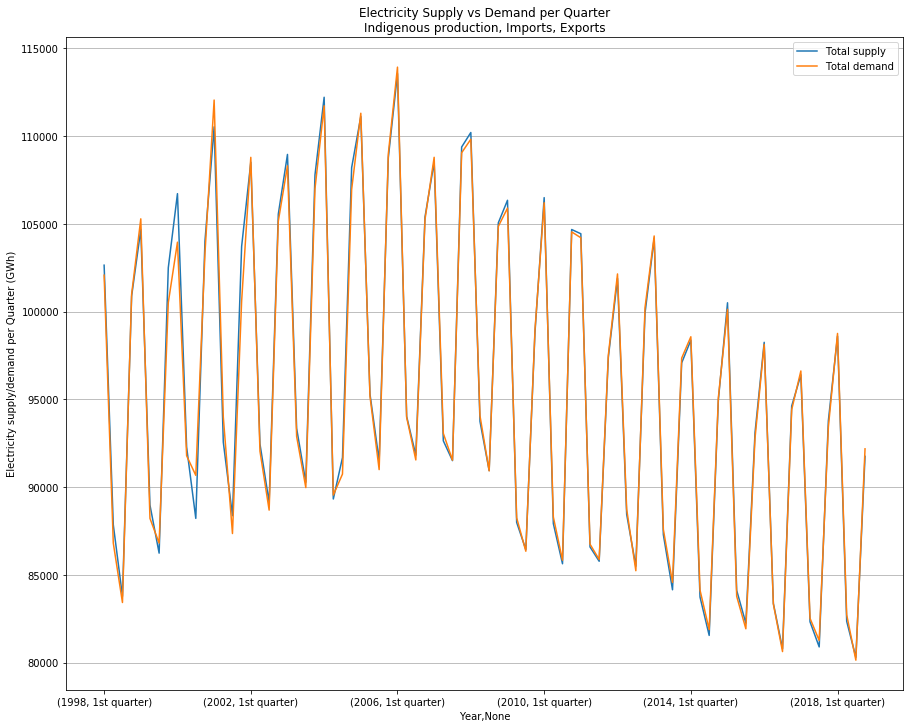

In [19]:
fig=plt.figure(figsize = [15,12])
ax = fig.add_subplot(111)
ax.xaxis.set(ticks=range(0,data7.shape[0],16))#,ticklabels=[0,0,0,0,0,0,30,0,0,0,0,0,0,10,0,0,0])
#ticklabels=list(range(1998,2019,4))) #, ticks=range(0, ,4),

ax.set(title= 'Electricity Supply vs Demand per Quarter\n\
Indigenous production, Imports, Exports',\
       ylabel = 'Electricity supply/demand per Quarter (GWh)', xlabel='Quarter')
data7[['Total supply','Total demand']].plot(ax=ax)     
ax.grid(True, axis='y')
#ax.set_ylim([0,115000])
plt.legend()

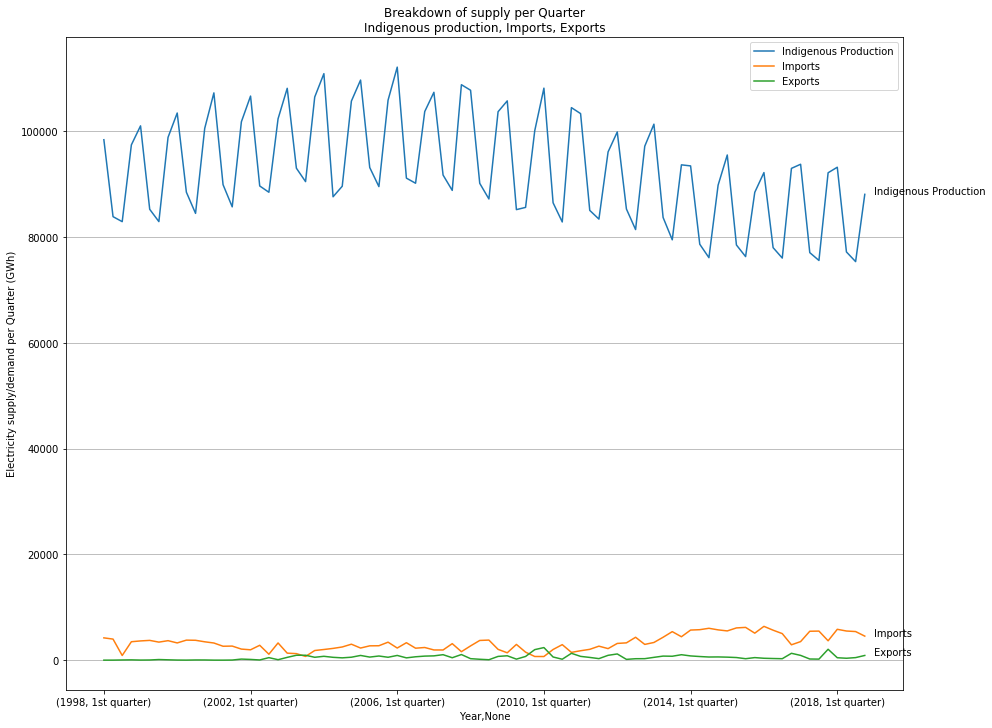

In [20]:
fig=plt.figure(figsize = [15,12])
ax = fig.add_subplot(111)
ax.xaxis.set(ticks=range(0,data7.shape[0],16))
colsToUse = ['Indigenous Production','Imports','Exports']
ax.set(title= 'Breakdown of supply per Quarter\n\
Indigenous production, Imports, Exports',\
       ylabel = 'Electricity supply/demand per Quarter (GWh)', xlabel='Quarter')
data7[colsToUse].plot(ax=ax)     
ax.grid(True, axis='y')
#ax.set_ylim([0,115000])
plt.legend()
for col in colsToUse:
    plt.text(data7.shape[0], data7[col][-1], col)

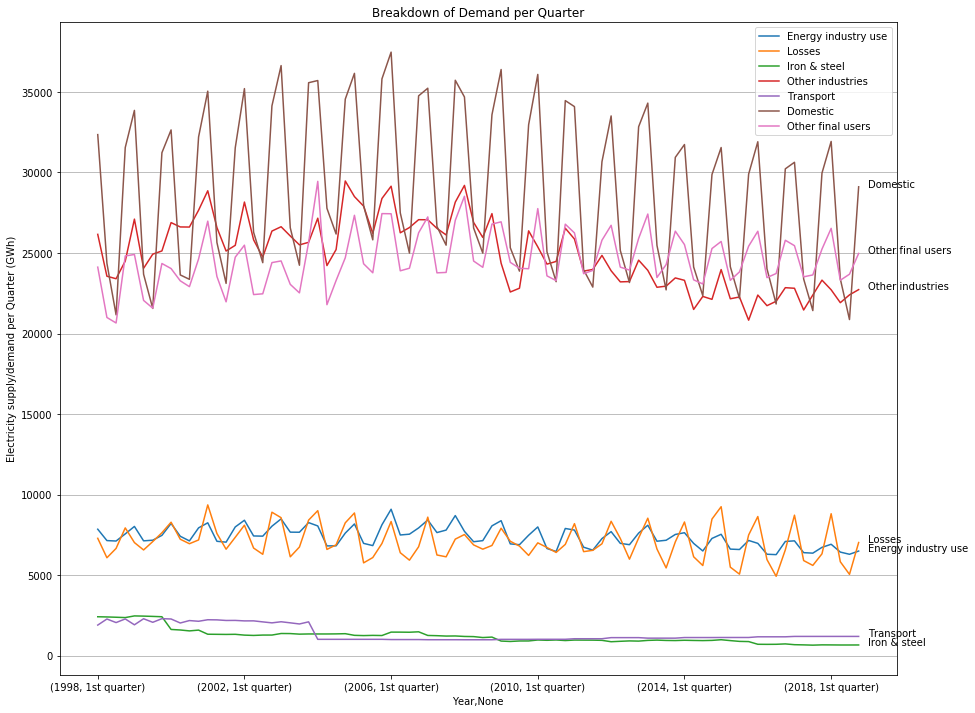

In [21]:
fig=plt.figure(figsize = [15,12])
ax = fig.add_subplot(111)
ax.xaxis.set(ticks=range(0,data7.shape[0],16))

colsToUse = ['Energy industry use','Losses','Iron & steel','Other industries','Transport',\
      'Domestic','Other final users']
ax.set(title= 'Breakdown of Demand per Quarter',\
       ylabel = 'Electricity supply/demand per Quarter (GWh)', xlabel='Quarter')
data7[colsToUse].plot(ax=ax)     
ax.grid(True, axis='y')
#ax.set_ylim([0,115000])
plt.legend()

    
for col in colsToUse:
    plt.text(data7.shape[0], data7[col][-1], col)

# 5.5 Availability and Consumption

In [22]:
data8 = pd.read_csv('5.5AvailabilityAndConsumption.csv', index_col=[0,1],  skiprows=4, \
                    skip_blank_lines=True, header=[0,1])
#data8.drop('Supply',0, inplace=True)
data8.dropna(axis=1, thresh=1, inplace=True)
#data8.dropna(axis=0, thresh=1, inplace=True)
data8.index.set_names(['Year','Quarter'], inplace=True)
data8.tail()

Public distribution system  \
                      Electricity available   
Year Quarter                                  
2017 Quarter 4                        82.87   
2018 Quarter 1                        87.44   
     Quarter 2                        70.99   
     Quarter 3                        69.44   
     Quarter 4 p                      80.85   

                                                              \
                 Transmission, distribution and other losses   
Year Quarter                                                   
2017 Quarter 4                                          6.71   
2018 Quarter 1                                          8.68   
     Quarter 2                                          5.47   
     Quarter 3                                          5.17   
     Quarter 4 p                                        6.62   

                                                               \
                 Sales to England and Wales Sales to Scotland   
Year Quarter                                                    
2017 Quarter 4                        67.36              6.85   
2018 Quarter 1                        69.40              7.26   
     Quarter 2                        58.00              5.76   
     Quarter 3                        57.02              5.52   
     Quarter 4 p                      65.62              6.67   

                                                                            \
                 Sales to Northern Ireland Total Sales Sales to Industrial   
Year Quarter                                                                 
2017 Quarter 4                        1.95       76.16               22.54   
2018 Quarter 1                        2.09       78.75               22.11   
     Quarter 2                        1.75       65.52               20.92   
     Quarter 3                        1.74       64.27               21.75   
     Quarter 4 p                      1.94       74.23               22.13   

                                                        Other generators  \
                 Sales to Domestic  Sales to Other Electricity available   
Year Quarter                                                               
2017 Quarter 4                29.77          23.85                  6.02   
2018 Quarter 1                31.69          24.96                  6.02   
     Quarter 2                22.79          21.80                  6.75   
     Quarter 3                20.31          22.21                  6.29   
     Quarter 4 p              28.56          23.54                  6.08   

                                                     \
                 Losses and statistical differences   
Year Quarter                                          
2017 Quarter 4                               -0.37    
2018 Quarter 1                                0.43    
     Quarter 2                                0.44    
     Quarter 3                                0.23    
     Quarter 4 p                              0.36    

                                            All electricity suppliers  \
                 Consumption of electricity     Electricity Available   
Year Quarter                                                            
2017 Quarter 4                         6.39                     88.89   
2018 Quarter 1                         5.59                     93.45   
     Quarter 2                         6.31                     77.74   
     Quarter 3                         6.06                     75.74   
     Quarter 4 p                       5.72                     86.93   

                                                                                
                 Losses and statistical differences Consumption of electricity  
Year Quarter                                                                    
2017 Quarter 4                                 6.34                      82.55  
2018 Quarter 1        

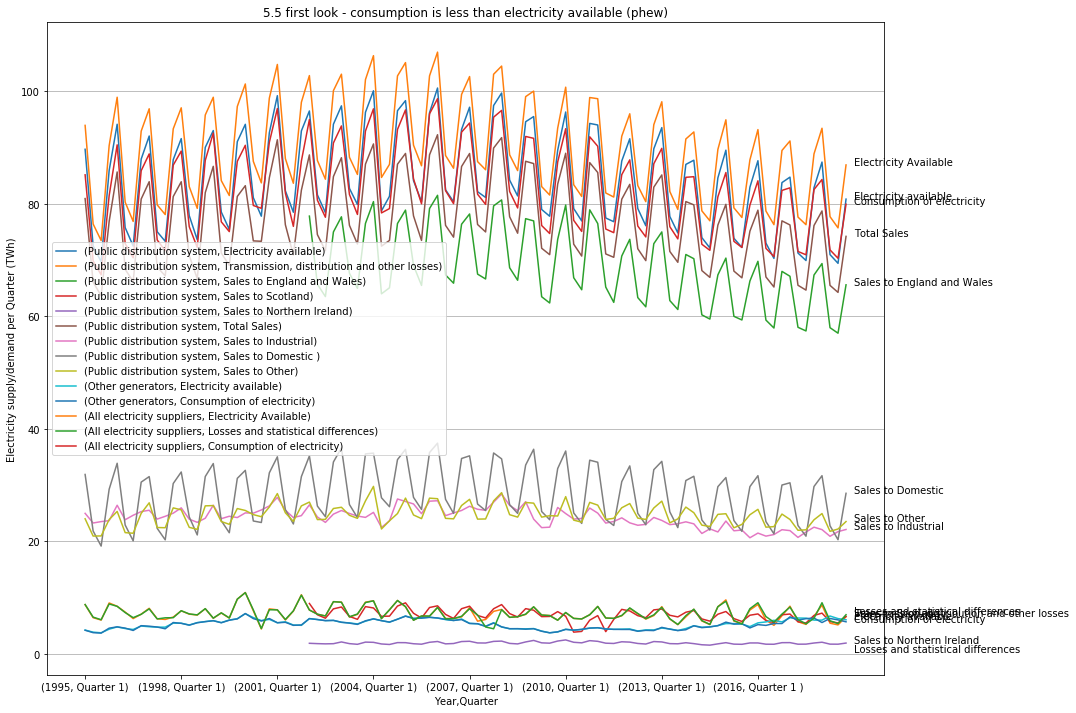

In [23]:
fig=plt.figure(figsize = [15,12])
ax = fig.add_subplot(111)
ax.xaxis.set(ticks=range(0,data8.shape[0],12))
colsToUse = data8.columns
ax.set(title= '5.5 first look - consumption is less than electricity available (phew)',\
       ylabel = 'Electricity supply/demand per Quarter (TWh)', xlabel='Quarter')
data8[colsToUse].plot(ax=ax)     
ax.grid(True, axis='y')
#ax.set_ylim([0,115000])
plt.legend()
for col in colsToUse:
    plt.text(data8.shape[0], float(data8[col][-1]),col[1])

# 5.6 Imports/Exports

In [24]:
data10 = pd.read_csv('5.6ImportsExportsQuarterly.csv', index_col=[0,1],  skiprows=4, \
                    skip_blank_lines=True, header=[0,1])
data10.drop('Belgium-UK',1,level=0,inplace=True)
data10.tail()

France-UK          Ireland-NI         Netherlands-UK          \
            Imports  Exports    Imports Exports        Imports Exports   
2017 Q4     1569.79  1568.66      47.69  166.74        1661.45   88.05   
2018 Q1     3608.70    68.00      74.76  213.24        1887.49   16.51   
     Q2     3373.44     3.96     114.77  176.32        1657.73   46.55   
     Q3     3362.47    57.22     101.98  189.86        1591.74   48.53   
     Q4 p   2942.23   267.37      85.27  268.44        1254.92   95.54   

          Ireland-Wales            Total          Scotland-England  \
                Imports Exports  Imports  Exports         Transfer   
2017 Q4          390.53  244.25  3669.46  2067.70          4838.98   
2018 Q1          272.58  169.73  5843.53   467.49          6353.27   
     Q2          373.74  141.90  5519.68   368.72          5694.22   
     Q3          361.85  194.05  5418.04   489.65          5246.19   
     Q4 p        268.74  267.56  4551.16   898.90          7441.00   

          England-Scotland Scotland-NI NI-Scotland  
                  Transfer    Transfer    Transfer  
2017 Q4              10.40      346.78      149.54  
2018 Q1             286.95      328.69      168.88  
     Q2             167.22      296.60      148.64  
     Q3             137.50      291.62      144.91  
     Q4 p           470.72      398.39      146.09

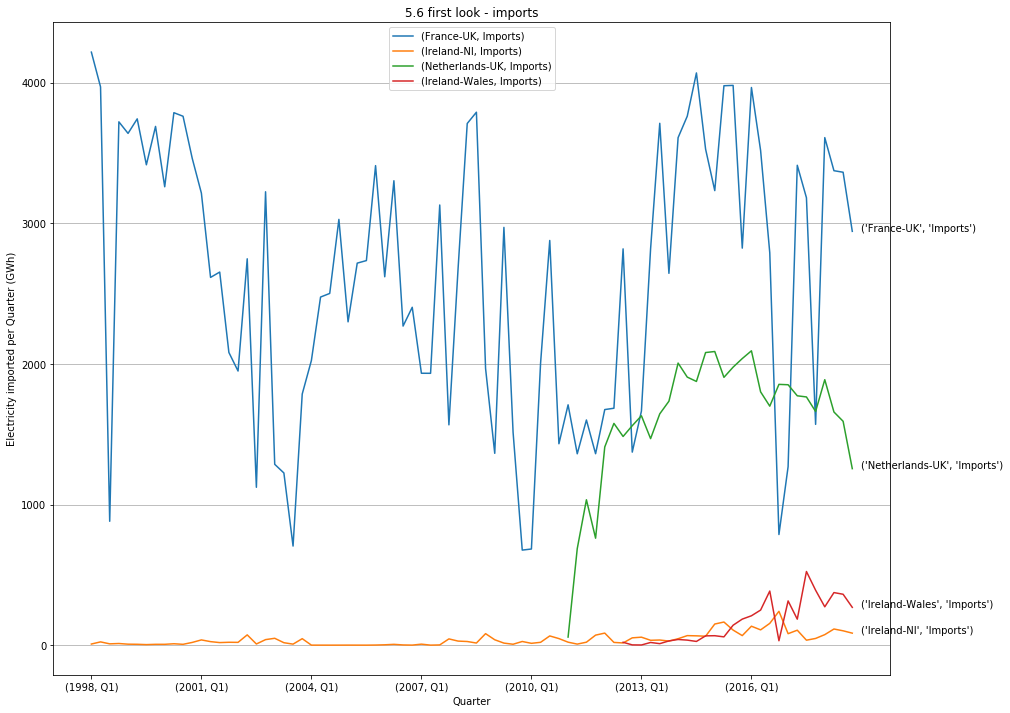

In [25]:
fig=plt.figure(figsize = [15,12])
ax = fig.add_subplot(111)
ax.xaxis.set(ticks=range(0,data10.shape[0],12))
colsToUse = []
for col in data10.columns:
    if (col[1] in ['Transfer', 'Exports']) or (col[0]=='Total'):
        continue
    else:
        colsToUse.append(col)
ax.set(title= '5.6 first look - imports',\
       ylabel = 'Electricity imported per Quarter (GWh)', xlabel='Quarter')
data10[colsToUse].plot(ax=ax)     
ax.grid(True, axis='y')
#ax.set_ylim([0,115000])
plt.legend()
for col in colsToUse:
    plt.text(data10.shape[0], float(data10[col][-1]),col)

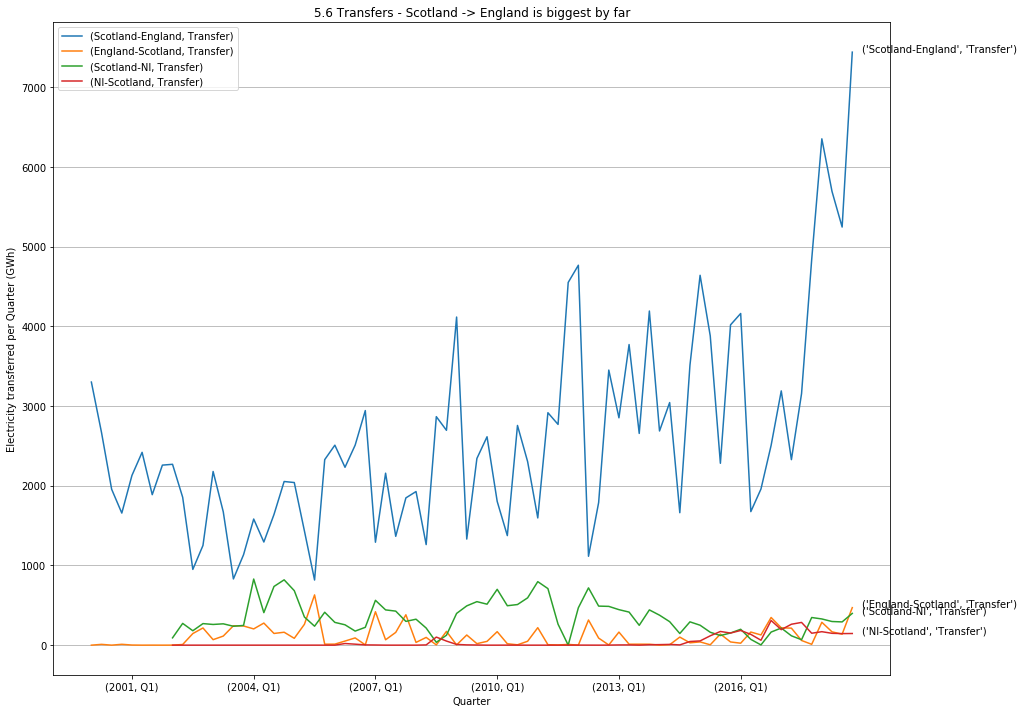

In [26]:
fig=plt.figure(figsize = [15,12])
ax = fig.add_subplot(111)
ax.xaxis.set(ticks=range(0,data10.shape[0],12))
colsToUse = []
for col in data10.columns:
    if (col[1] in ['Imports','Exports']) or (col[0]=='Total'):
        continue
    else:
        colsToUse.append(col)
ax.set(title= '5.6 Transfers - Scotland -> England is biggest by far',\
       ylabel = 'Electricity transferred per Quarter (GWh)', xlabel='Quarter')
data10[colsToUse].plot(ax=ax)     
ax.grid(True, axis='y')
plt.legend()
for col in colsToUse:
    plt.text(data10.shape[0], float(data10[col][-1]),col)

# EDF REMIT data - used/available capacity of each current UK nuclear power station

In [27]:
data14 = pd.read_csv('remit-data-2019-10-04-01-37-pm.csv', index_col=0,skip_blank_lines=True, header=[0], parse_dates=True)
data14 = data14[data14['FuelType']=='Nuclear']
data14 = data14[['StationName','AssetID','NormalCapacityMW','AvailableCapacityMW']]


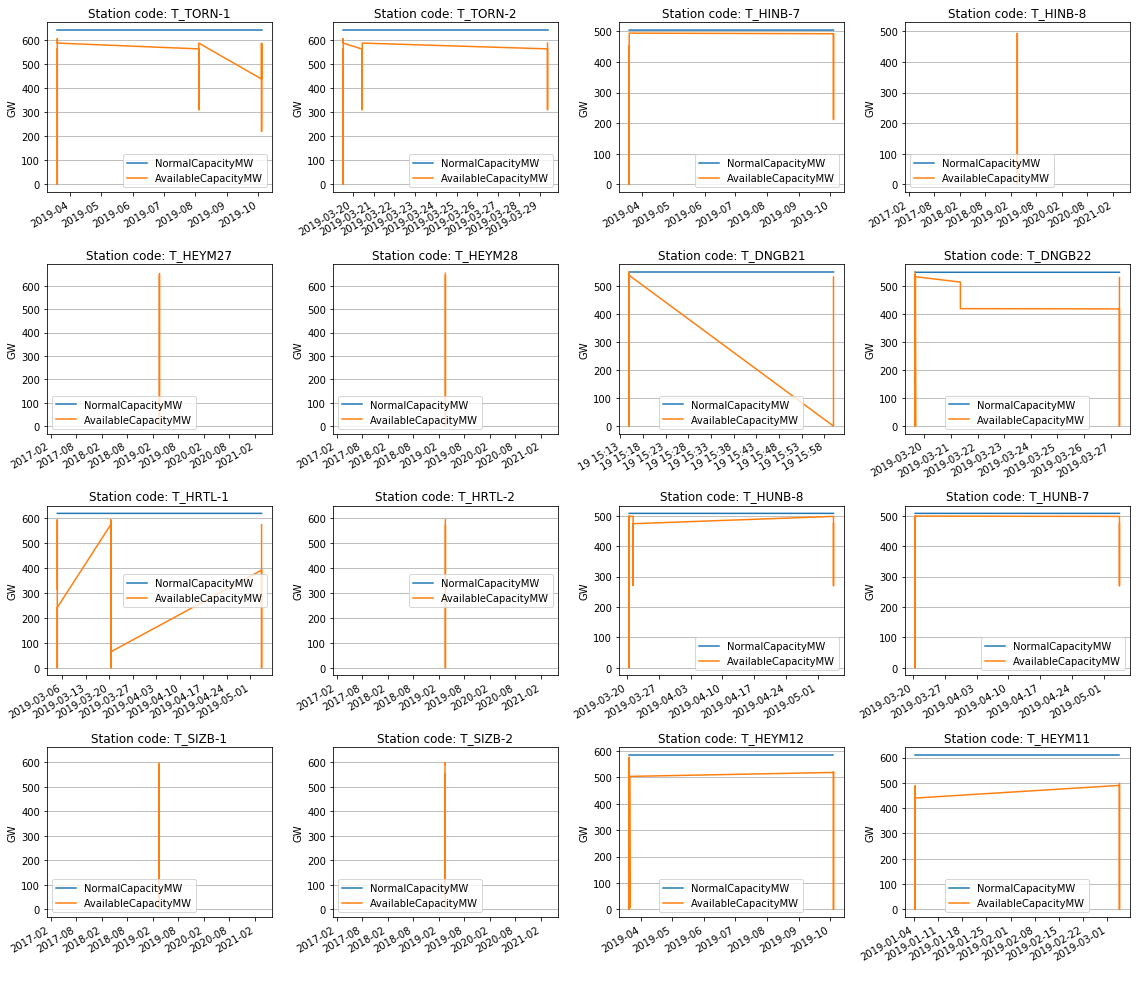

In [28]:
colsToUse = ['NormalCapacityMW','AvailableCapacityMW']
fig=plt.figure(figsize = [16,16])
i=0
for station in data14['AssetID'].unique():
    i+=1
    data15 = data14[data14['AssetID']==station]
    
    ax = fig.add_subplot(4,4,i)
    fig.tight_layout()
    data15[colsToUse].plot(ax=ax)
    ax.set(title= 'Station code: '+station,ylabel = 'GW', xlabel=' ')
    ax.grid(True, axis='y')


It turns out that the EDF REMIT data shows only current, active outages/events and future ones. There are only a few in the system that have already started, the rest are future predictions in e.g. 2021. The dates used above are when the relevant issue was identified, rather than the times the power ratings apply for, so are not useful. This data will not be used